In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
path_ames_train = r"Data\train.csv"
path_ames_test = r"Data\test.csv"

In [3]:
train = pd.read_csv(path_ames_train)
test = pd.read_csv(path_ames_test)

In [4]:
train.columns

Index(['ExterQual', 'AllFlrsSF', 'GrLivArea', 'SimplOverallCond', 'GarageArea',
       'TotRmsAbvGrd', 'LotFrontage', 'SalePrice'],
      dtype='object')

In [71]:
X_train = train[['ExterQual', 'AllFlrsSF', 'GrLivArea', 'SimplOverallCond', 'GarageArea', 'TotRmsAbvGrd', 'LotFrontage']]
y_train = train['SalePrice']
X_test = test[['ExterQual', 'AllFlrsSF', 'GrLivArea', 'SimplOverallCond', 'GarageArea', 'TotRmsAbvGrd', 'LotFrontage']]
y_test = test['SalePrice']

In [6]:
print(X_train.head(), y_train.head(), X_test.head(), y_test.head(), sep="\n")

   ExterQual  AllFlrsSF  GrLivArea  SimplOverallCond  GarageArea  \
0          4       1316       1316                 2         397   
1          4       2028       2028                 2         880   
2          3       1072       1072                 2         525   
3          3       1048       1048                 2         286   
4          3       1779       1779                 2         546   

   TotRmsAbvGrd  LotFrontage  
0             6         65.0  
1             7         88.0  
2             5         35.0  
3             6         72.0  
4             6         80.0  
0    169990
1    369900
2    140000
3    135000
4    197900
Name: SalePrice, dtype: int64
   ExterQual  AllFlrsSF  GrLivArea  SimplOverallCond  GarageArea  \
0          3       1839       1839                 3         416   
1          3       2126       2126                 2         538   
2          4       1709       1709                 2         380   
3          3       1902       1902         

In [56]:
def estimate_coef(x, y):
    xmean = x.mean()
    ymean = y.mean()
    n = len(x)
    ycrossx = sum(x * y)
    xsqu = sum(x**2)
    ssxy = ycrossx - (n * xmean * ymean)
    ssxx = xsqu - (n * (xmean**2))
    b_1 = ssxy / ssxx
    b_0 = ymean - (b_1 * xmean)
    return (b_0, b_1)

In [46]:
def plot_regression_line(x, y, b):
    plt.scatter(x, y, color = "m", marker = "o", s = 30)
    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color = "g")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

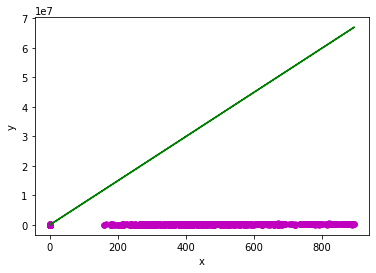

(214.31004114071553, 74795.1260414561)


In [55]:
x = np.array([548, 460, 608, 642, 836, 480, 636, 484, 468, 205])
y = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
# values = estimate_coef(X_train['GarageArea'], y_train)
values = estimate_coef(X_train['GarageArea'], y_train)
plot_regression_line(X_train['GarageArea'], y_train, values)
# values = estimate_coef(x,y)
print(values)
# values = values[1] + (values[0] * X_train['GarageArea'])
# print(pd.DataFrame([values, y_train]))
# plot_regression_line(x, y, 0)

In [53]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x, m_y = np.mean(x), np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x)- n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return(b_0, b_1)

In [70]:
linreg = LinearRegression()


In [72]:
linreg.fit(X_train,np.log(y_train))
y_pred = linreg.predict(X_test)
y_pred

array([12.11227082, 12.19875709, 12.17873549, 12.09451926, 11.79496421,
       11.62810742, 12.23094302, 11.66779875, 12.83933008, 11.42802489,
       13.03969447, 11.48996121, 11.96267792, 12.15572954, 11.84253379,
       11.80049608, 11.63719563, 11.95712008, 12.33129216, 12.18239258,
       12.02229166, 12.0255932 , 12.23719561, 11.87200608, 12.44798664,
       12.643851  , 12.47162239, 12.5982682 , 11.8215798 , 11.50148537,
       11.789251  , 13.22072258, 11.50903908, 11.87175444, 12.20648447,
       12.23039239, 11.69069064, 12.89000353, 11.7661653 , 12.30551334,
       12.29771967, 11.68183125, 12.84865739, 11.97590572, 12.48417858,
       12.05078167, 11.76415223, 11.68701845, 12.25244997, 12.23563131,
       11.51096238, 12.6868023 , 11.79805816, 11.80839364, 12.05803133,
       12.79445006, 12.15644059, 12.02083321, 11.5972928 , 12.61133737,
       12.17873549, 12.98542578, 12.19936653, 11.39135943, 11.90586361,
       11.8061422 , 11.79982215, 11.72513481, 11.82121504, 11.56

In [86]:
mae = mean_absolute_error(y_test, np.exp(y_pred))
print(mae)

29158.295036636497


In [98]:
rmse = (mean_squared_error(y_test, np.exp(y_pred)))**0.5
print(rmse)

42842.86889122488


In [99]:
math.sqrt(sum((y_test-np.exp(y_pred))**2)/len(y_test))

42842.86889122489

In [101]:
rsquared = r2_score(y_test, np.exp(y_pred))
print(rsquared)

0.7378446924962254


## Assessment

In [176]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [124]:
path = r"Data\lego_final.csv"

In [106]:
df = pd.read_csv(path)
print(df.columns)
df.head()

Index(['ages', 'list_price', 'num_reviews', 'piece_count', 'play_star_rating',
       'review_difficulty', 'star_rating', 'theme_name', 'val_star_rating',
       'country'],
      dtype='object')


,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
0,19,29.99,2,277,4.0,0,4.5,0,4.0,20
1,19,19.99,2,168,4.0,2,5.0,0,4.0,20
2,19,12.99,11,74,4.3,2,4.3,0,4.1,20
3,5,99.99,23,1032,3.6,0,4.6,1,4.3,20
4,5,79.99,14,744,3.2,1,4.6,1,4.1,20


In [120]:
X = df[['ages', 'num_reviews', 'piece_count', 'play_star_rating',
       'review_difficulty', 'star_rating', 'theme_name', 'val_star_rating',
       'country']]
y = df["list_price"]

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 6)
print(X_train.head())

      ages  num_reviews  piece_count  play_star_rating  review_difficulty  \
5133     8          202         2469               4.7                  1   
759     26            9          252               4.8                  0   
3803    26           56          659               4.6                  0   
6906    11            1           19               3.0                  5   
7129     7           84         4016               4.5                  1   

      star_rating  theme_name  val_star_rating  country  
5133          4.9           9              4.7        7  
759           4.6          39              4.6       20  
3803          4.6          34              3.9        4  
6906          4.0          13              4.0       10  
7129          3.9          34              3.5       10  


In [125]:
cols = X_train.columns
cols

Index(['ages', 'num_reviews', 'piece_count', 'play_star_rating',
       'review_difficulty', 'star_rating', 'theme_name', 'val_star_rating',
       'country'],
      dtype='object')

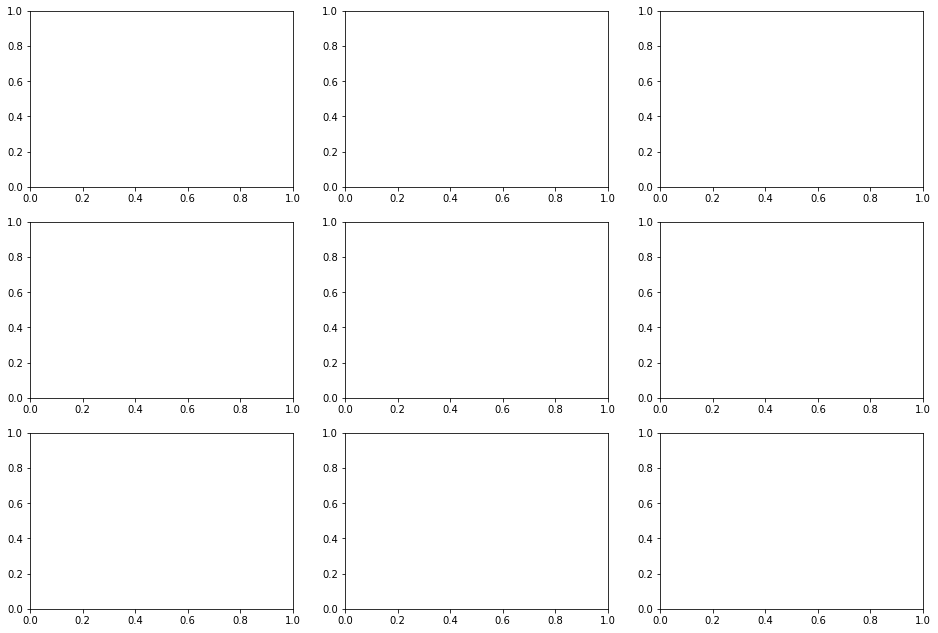

In [181]:
fig ,axes = plt.subplots(nrows=3, ncols=3, figsize = [16,11])

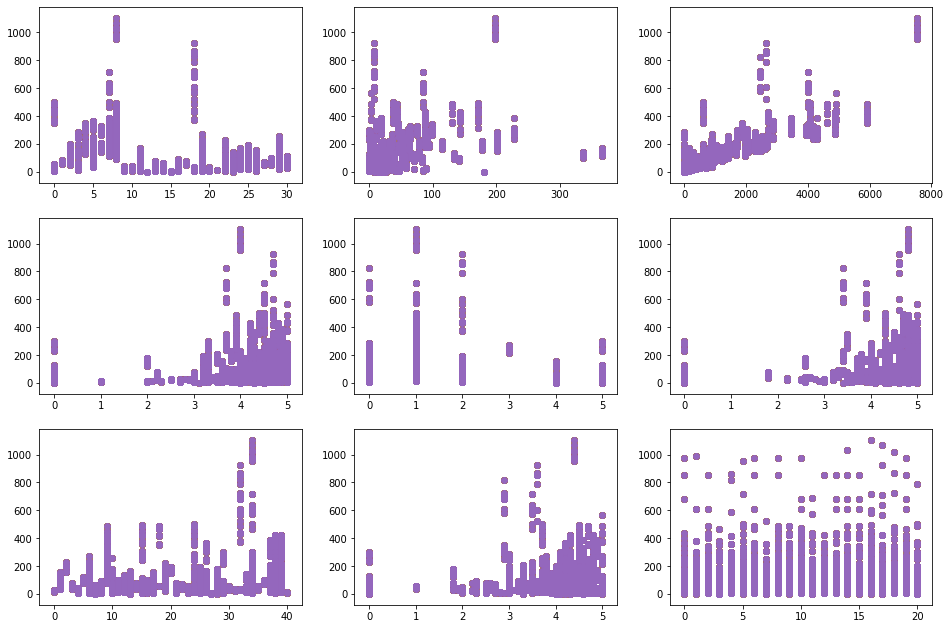

In [159]:
for i in range(len(axes)):
    for j in range(len(axes[0])):
        col = cols[ i * 3 + j]
        axes[i][j].scatter(X_train[col], y_train)
        axes[i][j].set_xlabel = col
        axes[i][j].set_ylabel = y_train.name
fig

In [182]:
for i in range(0,3):
    for j in range(0,3): 
            col = cols[i*3 + j]
            axes[i,j].set_title(col)
            axes[i,j].scatter(X_train[col],y_train)
            axes[i,j].set_xlabel(col)
            axes[i,j].set_ylabel('list_price')

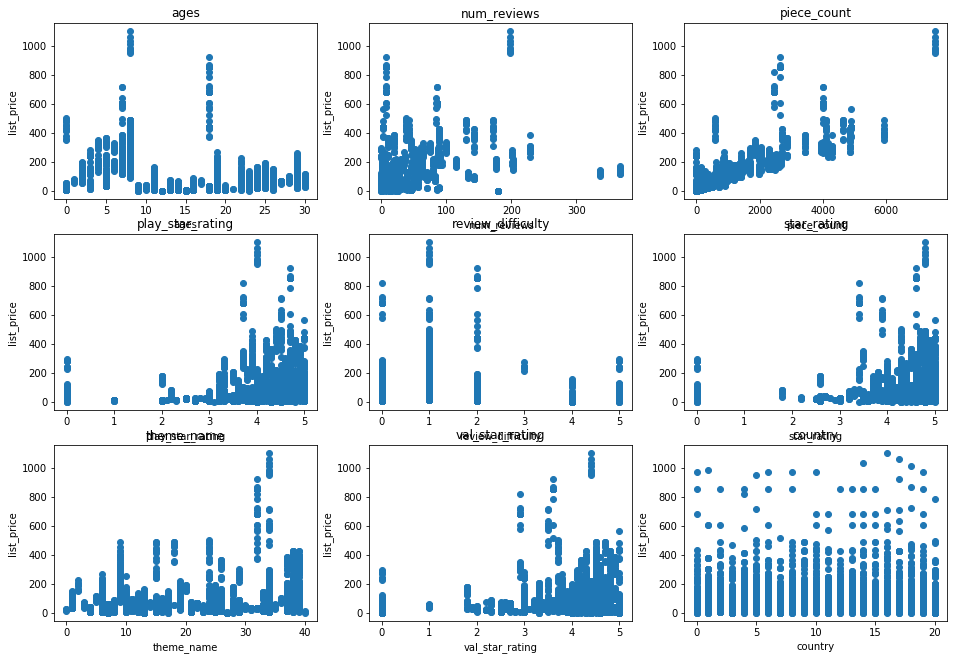

In [183]:
fig

In [160]:
y_train.name

'list_price'

In [184]:
corr = X_train.corr()
corr

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
ages,1.000000,-0.160969,-0.090685,0.232847,-0.239683,0.102633,0.476178,0.116349,-0.001526
num_reviews,-0.160969,1.000000,0.542924,0.151801,-0.196846,0.160762,0.012342,0.172431,0.001953
piece_count,-0.090685,0.542924,1.000000,0.174411,-0.312239,0.180903,0.173318,0.192863,0.002506
play_star_rating,0.232847,0.151801,0.174411,1.000000,-0.670508,0.902573,0.151078,0.921824,-0.000958
review_difficulty,-0.239683,-0.196846,-0.312239,-0.670508,1.000000,-0.637901,-0.153948,-0.650333,0.006417
star_rating,0.102633,0.160762,0.180903,0.902573,-0.637901,1.000000,0.065264,0.908720,-0.003865
theme_name,0.476178,0.012342,0.173318,0.151078,-0.153948,0.065264,1.000000,0.097430,-0.003625
val_star_rating,0.116349,0.172431,0.192863,0.921824,-0.650333,0.908720,0.097430,1.000000,0.002413
country,-0.001526,0.001953,0.002506,-0.000958,0.006417,-0.003865,-0.003625,0.002413,1.000000


In [185]:
if('play_star_rating' in X_train.columns):
    X_train.drop(columns=['play_star_rating', 'val_star_rating'], inplace=True)
if('play_star_rating' in X_test.columns):
    X_test.drop(columns=['play_star_rating', 'val_star_rating'], inplace=True)

C:\Users\eakhumb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [177]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [178]:
mse = mean_squared_error(y_test, y_pred)
print(mse)
r2 = r2_score(y_test, y_pred)
print(r2)

2106.7634311857664
0.7747160273433753


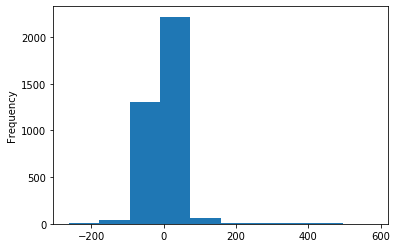

In [179]:
residual = y_test-y_pred
residual.plot(kind='hist')